## Joining Data in Database
In this Jupyter Notebook file we are going to take our data that was added to the database (make sure you run files to create and insert data into database before running anything in this file) and joining it so we can view all of the data from each matching movie from our datasets together in one place.

### Import <code>sqlite3</code> package and connect to the <code>movies.db</code> database and create a <code>cursor</code> object

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

connection = sqlite3.connect('movies.db')
cursor = connection.cursor() #, d.director_name, g.genre_name

In [2]:
cursor.execute('DROP VIEW IF EXISTS actor_popularity')

cursor.execute('''
                CREATE VIEW actor_popularity AS 
                SELECT s.star_name AS actors_name, COUNT(mbo.movie_name) AS movie_number, 
                CAST(AVG(mbo.world_wide_bo) AS INTEGER) AS avg_bo, 
                CAST(AVG(mbo.domestic_amount) AS INTEGER) AS avg_domestic,
                CAST(AVG(mbo.foreign_amount) AS INTEGER) AS avg_foreign,
                CAST(AVG(mbo.domestic_percentage) AS INTEGER) AS avg_dom_pct,
                CAST(AVG(mbo.foreign_percentage) AS INTEGER) AS avg_frn_pct,
                CAST(AVG(mr.tomato_meter) AS INTEGER) AS avg_tomato,
                CAST(AVG(mr.audience_score) AS INTEGER) AS avg_audience
                FROM movies_box_office AS mbo
                INNER JOIN movie_reviews AS mr ON mbo.movie_name = mr.movie_name
                INNER JOIN imdb_movies AS im ON mbo.movie_name = im.movie_name
                INNER JOIN movie_stars AS ms ON im.imdb_movies_id = ms.movie_id
                INNER JOIN stars AS s ON ms.star_id = s.star_id
                GROUP BY s.star_name
                ORDER BY movie_number DESC, avg_bo DESC
               ''')




## Actors Data Conclusions
To get the most successful and most popular actors of the last 5 years I combined The data from IMDB, Box Office Numbers, and Rotten Tomatos.  I queried the data from the database containing all of the data from those datasets and first found what actors had been in the most amount of movies in this time period.  I found this to be one of the largest indicators for the success of an actor.    

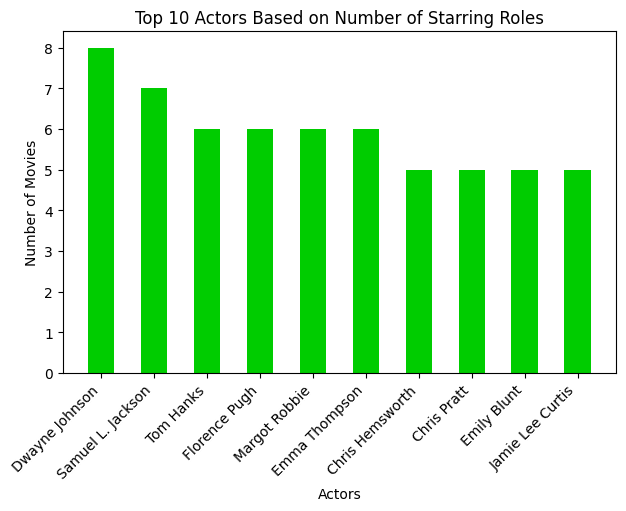

In [3]:
# Data preparation
cursor.execute('SELECT movie_number FROM actor_popularity LIMIT 10')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT actors_name FROM actor_popularity LIMIT 10')
actors = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(actors, num_of_movies, width=0.5, color='#00cc00')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Actors Based on Number of Starring Roles')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')

# Display the chart
plt.show()


I then, out of those same actors, got how much money they pulled in the box office from the movies they starred in.  This is my second gauge for success because it determines whether these actors influence people to go see the movies they star in.

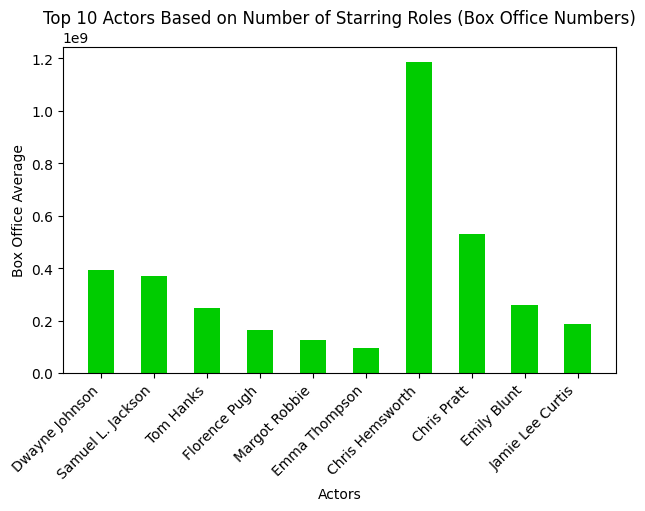

In [4]:
# Data preparation
cursor.execute('SELECT avg_bo FROM actor_popularity LIMIT 10')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT actors_name FROM actor_popularity LIMIT 10')
actors = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(actors, num_of_movies, width=0.5, color='#00cc00')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Actors Based on Number of Starring Roles (Box Office Numbers)')
plt.xlabel('Actors')
plt.ylabel('Box Office Average')

# Display the chart
plt.show()

After that I got the Rotten Tomatoes average critic approval percentage and the average audience approval percentage for each actor.  The reason these are the last gauges for success is because everyone has differing opinions about movies.  With those though, you see which actors star in movies that critics generally like and which actors star in movies that general audiences like.

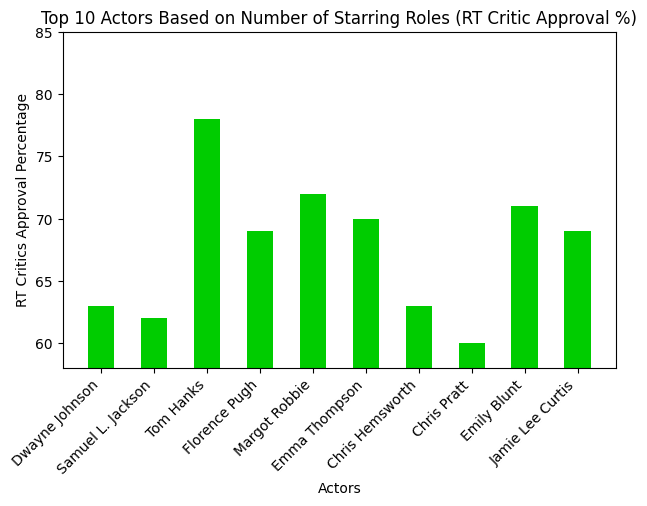

In [5]:
# Data preparation
cursor.execute('SELECT avg_tomato FROM actor_popularity LIMIT 10')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT actors_name FROM actor_popularity LIMIT 10')
actors = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(actors, num_of_movies, width=0.5, color='#00cc00')
plt.gca().set_ylim([58, 85])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Actors Based on Number of Starring Roles (RT Critic Approval %)')
plt.xlabel('Actors')
plt.ylabel('RT Critics Approval Percentage')

# Display the chart
plt.show()

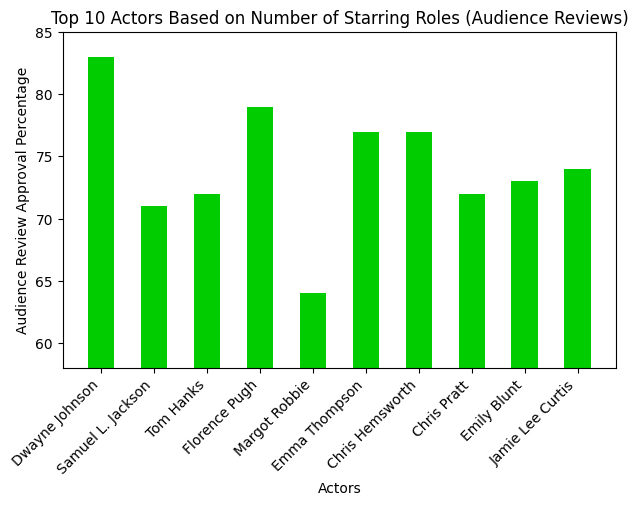

In [6]:
# Data preparation
cursor.execute('SELECT avg_audience FROM actor_popularity LIMIT 10')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT actors_name FROM actor_popularity LIMIT 10')
actors = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(actors, num_of_movies, width=0.5, color='#00cc00')
plt.gca().set_ylim([58, 85])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Actors Based on Number of Starring Roles (Audience Reviews)')
plt.xlabel('Actors')
plt.ylabel('Audience Review Approval Percentage')

# Display the chart
plt.show()

In [7]:
cursor.execute('DROP VIEW IF EXISTS director_success')

cursor.execute('''
                CREATE VIEW director_success AS 
                SELECT d.director_name AS directors_name, COUNT(mbo.movie_name) AS movie_number, 
                CAST(AVG(mbo.world_wide_bo) AS INTEGER) AS avg_bo, 
                CAST(AVG(mbo.domestic_amount) AS INTEGER) AS avg_domestic,
                CAST(AVG(mbo.foreign_amount) AS INTEGER) AS avg_foreign,
                CAST(AVG(mbo.domestic_percentage) AS INTEGER) AS avg_dom_pct,
                CAST(AVG(mbo.foreign_percentage) AS INTEGER) AS avg_frn_pct,
                CAST(AVG(mr.tomato_meter) AS INTEGER) AS avg_tomato,
                CAST(AVG(mr.audience_score) AS INTEGER) AS avg_audience
                FROM movies_box_office AS mbo
                INNER JOIN movie_reviews AS mr ON mbo.movie_name = mr.movie_name
                INNER JOIN imdb_movies AS im ON mbo.movie_name = im.movie_name
                INNER JOIN movie_directors AS md ON im.imdb_movies_id = md.movie_id
                INNER JOIN directors AS d ON md.director_id = d.director_id
                GROUP BY directors_name
                ORDER BY avg_bo DESC
               ''')

## Directors Data Conclusions
I gauged directors success a little differently than I gauged actors success.  I first got the top ten directors based on their average box office success.  The reason box office success is more important than the amount of movies each director had worked on is because the frequency at which directors direct movies is generally slower than the frequency that big name actors star in movies.  I found that the directors that made more movies within this time period did not average high box office numbers.  I also found that the top of the list contained the Russo brothers, who had the same success in the box office due to co-directing the same movies.  For this reason I decided to do the top 11 directors instead of the top 10. 

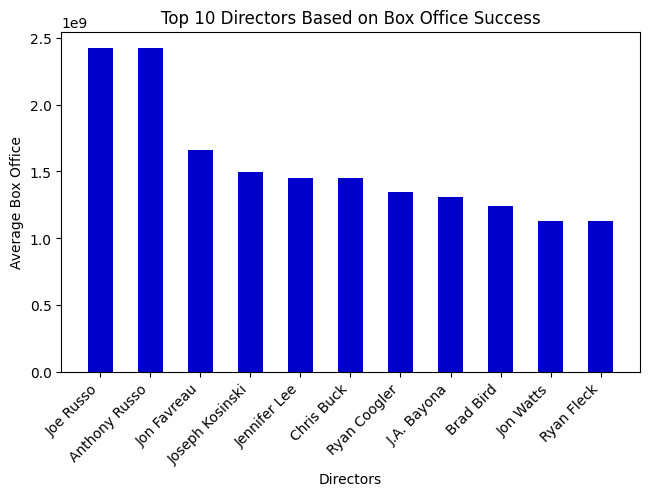

In [8]:
# Data preparation
cursor.execute('SELECT avg_bo FROM director_success LIMIT 11')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT directors_name FROM director_success LIMIT 11')
actors = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(actors, num_of_movies, width=0.5, color='#0000cc')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Directors Based on Box Office Success')
plt.xlabel('Directors')
plt.ylabel('Average Box Office')

# Display the chart
plt.show()

For the second gauge for directors success I got the average Rotton Tomatoes critic approval percentages and Rotten Tomatoes audience approval percentages.  These are the second gauges of success becasue they tell you what the critics and general audience members thought of the movies these directors directed.   

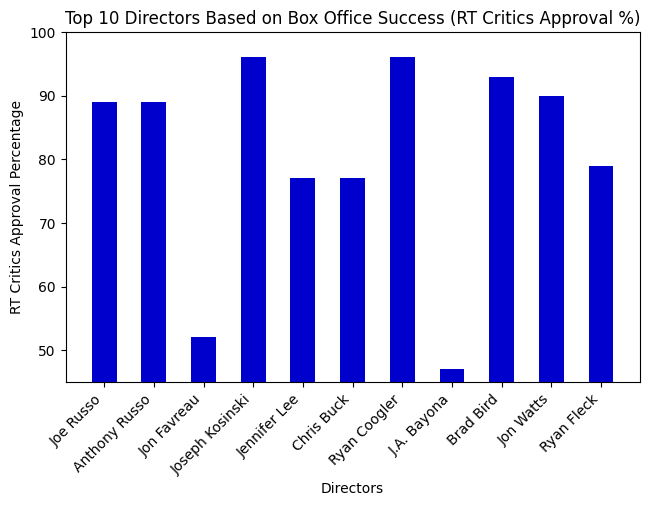

In [9]:
# Data preparation
cursor.execute('SELECT avg_tomato FROM director_success LIMIT 11')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT directors_name FROM director_success LIMIT 11')
actors = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(actors, num_of_movies, width=0.5, color='#0000cc')
plt.gca().set_ylim([45, 100])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Directors Based on Box Office Success (RT Critics Approval %)')
plt.xlabel('Directors')
plt.ylabel('RT Critics Approval Percentage')

# Display the chart
plt.show()

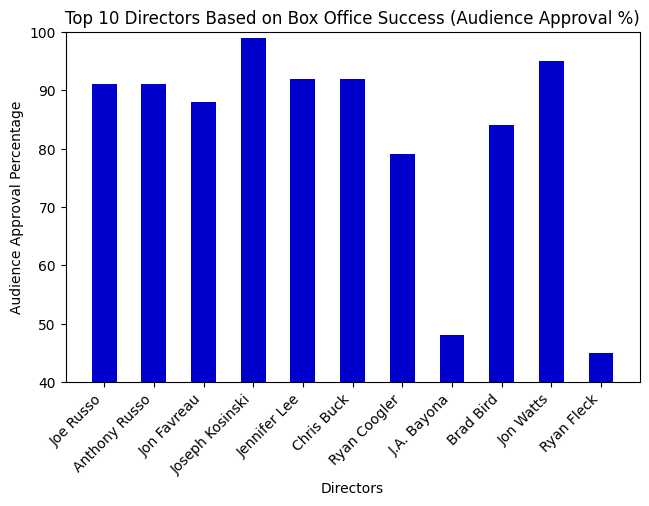

In [10]:
# Data preparation
cursor.execute('SELECT avg_audience FROM director_success LIMIT 11')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT directors_name FROM director_success LIMIT 11')
actors = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(actors, num_of_movies, width=0.5, color='#0000cc')
plt.gca().set_ylim([40, 100])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Directors Based on Box Office Success (Audience Approval %)')
plt.xlabel('Directors')
plt.ylabel('Audience Approval Percentage')

# Display the chart
plt.show()

The last graph only gauges how many movies each director directed.  All of them, except for the Russo brothers, directed only one movie in the last 5 years.

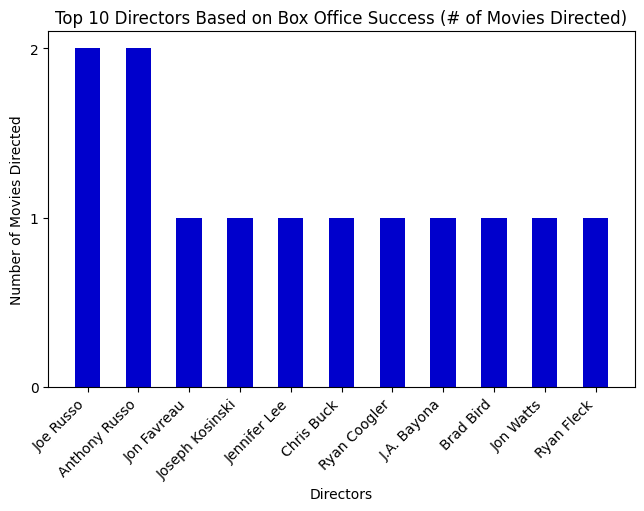

In [11]:
# Data preparation
cursor.execute('SELECT movie_number FROM director_success LIMIT 11')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT directors_name FROM director_success LIMIT 11')
actors = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(actors, num_of_movies, width=0.5, color='#0000cc')
plt.yticks([0, 1, 2])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Directors Based on Box Office Success (# of Movies Directed)')
plt.xlabel('Directors')
plt.ylabel('Number of Movies Directed')

# Display the chart
plt.show()

In [12]:
cursor.execute('DROP VIEW IF EXISTS genre_success')
cursor.execute('DROP VIEW IF EXISTS genre_frequency')
cursor.execute('DROP VIEW IF EXISTS genre_reception')

cursor.execute('''
                CREATE VIEW genre_success AS 
                SELECT g.genre_name AS genre, COUNT(mbo.movie_name) AS movie_number, 
                CAST(AVG(mbo.world_wide_bo) AS INTEGER) AS avg_bo
                FROM movies_box_office AS mbo
                INNER JOIN imdb_movies AS im ON mbo.movie_name = im.movie_name
                INNER JOIN movie_genres AS mg ON im.imdb_movies_id = mg.movie_id
                INNER JOIN genres AS g ON mg.genre_id = g.genre_id
                GROUP BY genre
                ORDER BY avg_bo DESC
               ''')

cursor.execute('''
                CREATE VIEW genre_frequency AS 
                SELECT g.genre_name AS genre, COUNT(mbo.movie_name) AS movie_number, 
                CAST(AVG(mbo.world_wide_bo) AS INTEGER) AS avg_bo
                FROM movies_box_office AS mbo
                INNER JOIN imdb_movies AS im ON mbo.movie_name = im.movie_name
                INNER JOIN movie_genres AS mg ON im.imdb_movies_id = mg.movie_id
                INNER JOIN genres AS g ON mg.genre_id = g.genre_id
                GROUP BY genre
                ORDER BY movie_number DESC
               ''')

cursor.execute('''
                CREATE VIEW genre_reception AS 
                SELECT g.genre_name AS genre, COUNT(mr.movie_name) AS movie_number, 
                CAST(AVG(mr.tomato_meter) AS INTEGER) AS avg_tomato,
                CAST(AVG(mr.audience_score) AS INTEGER) AS avg_audience
                FROM movie_reviews AS mr
                INNER JOIN imdb_movies AS im ON mr.movie_name = im.movie_name
                INNER JOIN movie_genres AS mg ON im.imdb_movies_id = mg.movie_id
                INNER JOIN genres AS g ON mg.genre_id = g.genre_id
                GROUP BY genre
                ORDER BY movie_number DESC
               ''')

## Movie Genre Data Analysis
To see what genres have been the most successful I first see what genres had the best average box office performance.  I used a pie chart to illustrate the difference in each genre's success.

[]

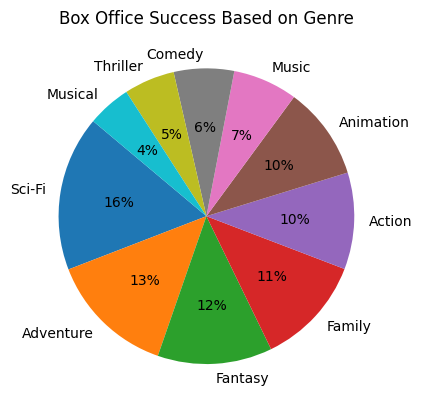

In [13]:
# Data preparation
cursor.execute('SELECT avg_bo FROM genre_success LIMIT 10')
bo_numbers = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT genre FROM genre_success LIMIT 10')
actors = [item[0] for item in cursor.fetchall()]

# Creating the pie chart
plt.pie(bo_numbers, labels=actors, autopct='%d%%', startangle=140)

# Add a title
plt.title('Box Office Success Based on Genre')

plt.plot()

The next thing I gauged was the frequency of each genre in the past 5 years. This shows what genres are used the most and which are not used as much.

[]

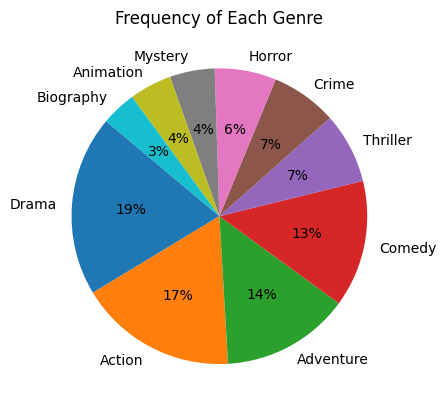

In [14]:
# Data preparation
cursor.execute('SELECT movie_number FROM genre_frequency LIMIT 10')
bo_numbers = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT genre FROM genre_frequency LIMIT 10')
actors = [item[0] for item in cursor.fetchall()]

# Creating the pie chart
plt.pie(bo_numbers, labels=actors, autopct='%d%%', startangle=140)

# Add a title
plt.title('Frequency of Each Genre')

plt.plot()

The next two graphs show what the average approval was of movies of each genre were by both critics and general audience members. 

[]

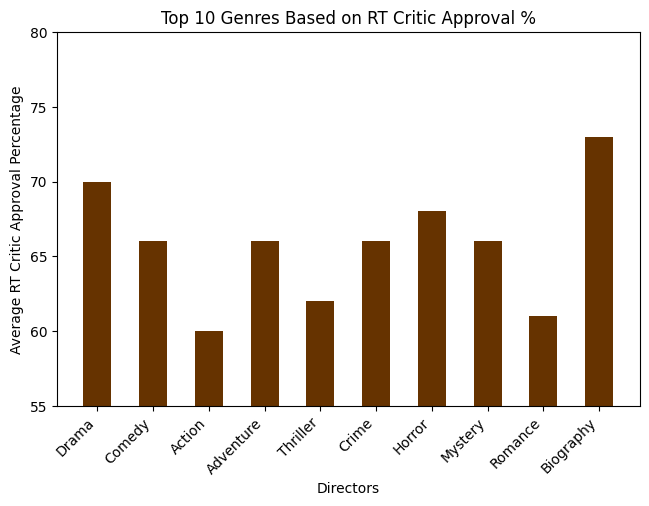

In [15]:
# Data preparation
cursor.execute('SELECT avg_tomato FROM genre_reception LIMIT 10')
avg_tomato = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT genre FROM genre_reception LIMIT 10')
genres = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(genres, avg_tomato, width=0.5, color='#663300')
plt.gca().set_ylim([55, 80])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Genres Based on RT Critic Approval %')
plt.xlabel('Directors')
plt.ylabel('Average RT Critic Approval Percentage')

plt.plot()

[]

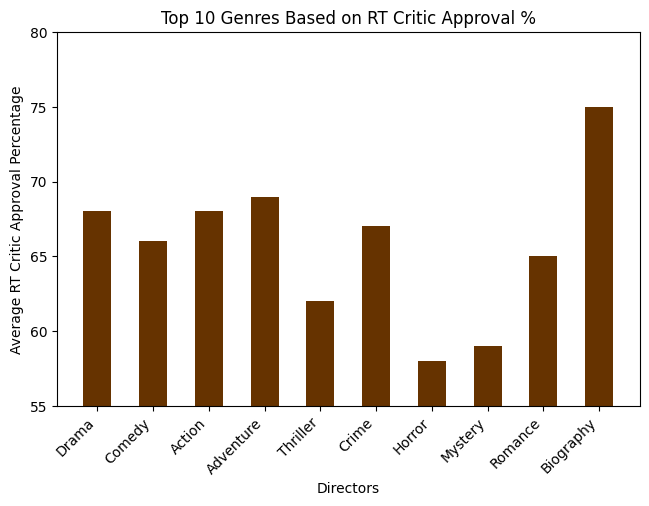

In [16]:
# Data preparation
cursor.execute('SELECT avg_audience FROM genre_reception LIMIT 10')
avg_tomato = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT genre FROM genre_reception LIMIT 10')
genres = [item[0] for item in cursor.fetchall()]

# Make a bar chart
plt.bar(genres, avg_tomato, width=0.5, color='#663300')
plt.gca().set_ylim([55, 80])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Make labels for the graph
plt.title('Top 10 Genres Based on RT Critic Approval %')
plt.xlabel('Directors')
plt.ylabel('Average RT Critic Approval Percentage')

plt.plot()

In [17]:
connection.close()